In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
df=pd.read_csv('Play Store Data.csv')


In [55]:
def convert_shorthand(x):
    if isinstance(x, str):
        x = x.upper().strip()
        if 'M' in x:
            return float(x.replace('M', '')) * 1000000
        elif 'K' in x:
            return float(x.replace('K', '')) * 1000
        elif 'B' in x:
            return float(x.replace('B', '')) * 1000000000
        else:
            return float(x)
    return x

In [56]:
df['Reviews']= df['Reviews'].apply(convert_shorthand).astype(int)



In [57]:
fil_df = df[df['Reviews'] > 1000]


In [58]:
# fil_df['Rating'].isnull().count()
top5_categories = fil_df.groupby('Category')['Reviews'].sum().nlargest(5).index
fil_df = fil_df[fil_df['Category'].isin(top5_categories)]
top5_categories

Index(['GAME', 'COMMUNICATION', 'SOCIAL', 'FAMILY', 'TOOLS'], dtype='object', name='Category')

In [59]:
def get_sentiment(rating):
    if rating >= 4.1:
        return 'Positive'
    elif rating >= 3.0:
        return 'Neutral'
    else:
        return 'Negative'

fil_df['Sentiment'] = fil_df['Rating'].apply(get_sentiment)

def group_rating(r):
    if r <= 2.0:
        return '1-2 stars'
    elif r <= 4.0:
        return '3-4 stars'
    else:
        return '4-5 stars'

fil_df['Rating Group'] = fil_df['Rating'].apply(group_rating)


C:\Users\phars\AppData\Local\Temp\ipykernel_20184\528027134.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(pivot_df['Category'], rotation=45, ha='right')


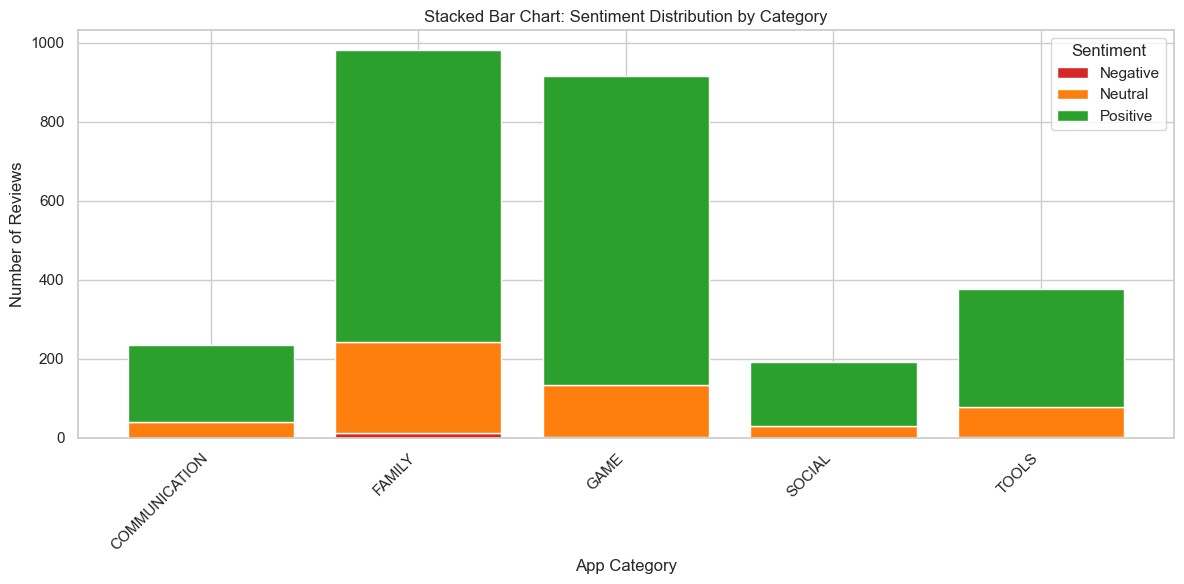

In [60]:
# Group by Category and Sentiment only
grouped = fil_df.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

pivot_df = grouped.pivot_table(index='Category', columns='Sentiment', values='Count', fill_value=0).reset_index()


for sentiment in ['Negative', 'Neutral', 'Positive']:
    if sentiment not in pivot_df.columns:
        pivot_df[sentiment] = 0

fig, ax = plt.subplots(figsize=(12, 6))

# PLOTTING ...
ax.bar(pivot_df['Category'], pivot_df['Negative'], label='Negative', color='#d62728')
ax.bar(pivot_df['Category'], pivot_df['Neutral'], bottom=pivot_df['Negative'], label='Neutral', color='#ff7f0e')
ax.bar(pivot_df['Category'], pivot_df['Positive'], 
       bottom=pivot_df['Negative'] + pivot_df['Neutral'], label='Positive', color='#2ca02c')

ax.set_title('Stacked Bar Chart: Sentiment Distribution by Category')
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('App Category')
ax.set_xticklabels(pivot_df['Category'], rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
